### *Importing Libraries and loading Data*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords

# Disable Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('COVID clinical trials.csv')

### *Initial Data Exploration*

In [3]:
df.head()

Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Infection   
2                                            covid19   
3                                              COVID   
4  Maternal Fetal Infection Transmission|COVID-19...   

                                       Interventions  \
0   Diagnostic Test: ID Now™ COVID-19 Screening Test   
1    Drug: Drug COVID19-0001-USR|Drug: normal saline   
2  Other: Lung CT scan analysis in COVID-19 patients   
3          Diagnostic Test: COVID 19 Diagnostic Test   
4  Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...   

                                    Outcome Measures  \
0  Evaluate the diagnostic performance of the ID ...   
1  Change on viral load results from baseline aft...   
2  A qualitative analysis of parenchymal lung dam...   
3  Proportion of asymptomatic subjects|Proportion...   
4  COVID-19 by positive PCR in cord blood and / o...   

                               Sponsor/Collaborators  ...         Other IDs  \
0              Groupe Hospitalier Paris Saint Joseph  ...       COVID-IDNow   
1                         United Medical Specialties  ...  COVID19-0001-USR   
2                       University of Milano Bicocca  ...       TAC-COVID19   
3                    Hong Kong Sanatorium & Hospital  ...        RC-2020-08   
4  Centre Hospitalier Régional d'Orléans|Centre d...  ...      CHRO-2020-10   

         Start Date Primary Completion Date   Completion Date  \
0  November 9, 2020       December 22, 2020    April 30, 2021   
1  November 2, 2020       December 15, 2020  January 29, 2021   
2       May 7, 2020           June 15, 2021     June 15, 2021   
3      May 25, 2020           July 31, 2020   August 31, 2020   
4       May 5, 2020                May 2021          May 2021   

       First Posted Results First Posted Last Update Posted  \
0     March 8, 2021                  NaN      March 8, 2021   
1  October 20, 2020                  NaN   October 20, 2020   
2      May 20, 2020                  NaN   November 9, 2020   
3      June 4, 2020                  NaN       June 4, 2020   
4      May 20, 2020                  NaN       June 4, 2020   

                                           Locations Study Documents  \
0  Groupe Hospitalier Paris Saint-Joseph, Paris, ...             NaN   
1       Cimedical, Barranquilla, Atlantico, Colombia             NaN   
2  Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...             NaN   
3  Hong Kong Sanatorium & Hospital, Hong Kong, Ho...             NaN   
4                       CHR Orléans, Orléans, France             NaN   

                                           URL  
0  https://ClinicalTrials.gov/show/NCT04785898  
1  https://ClinicalTrials.gov/show/NCT04595136  
2  https://ClinicalTrials.gov/show/NCT04395482  
3  https://ClinicalTrials.gov/show/NCT04416061  
4  https://ClinicalTrials.gov/show/NCT04395924  

[5 rows x 27 columns]

In [4]:
print(df.head())

   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Inf

In [5]:
df.shape

(5783, 27)

In [6]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [7]:
# Categorical features
df.select_dtypes(include ='object').columns

Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Funded Bys',
       'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [8]:
# Numerical features
df.select_dtypes(exclude ='object').columns

Index(['Rank', 'Enrollment'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [10]:
# Summary Statistics of Numerical Columns
df.describe()

Rank    Enrollment
count  5783.000000  5.749000e+03
mean   2892.000000  1.831949e+04
std    1669.552635  4.045437e+05
min       1.000000  0.000000e+00
25%    1446.500000  6.000000e+01
50%    2892.000000  1.700000e+02
75%    4337.500000  5.600000e+02
max    5783.000000  2.000000e+07

In [11]:
# Summary Statistics of categorical Columns
df.describe(include='object')

NCT Number                                              Title  \
count          5783                                               5783   
unique         5783                                               5775   
top     NCT04785898  Study Assessing Vagus Nerve Stimulation in CoV...   
freq              1                                                  2   

         Acronym      Status         Study Results Conditions  \
count       2480        5783                  5783       5783   
unique      2338          12                     2       3067   
top     COVID-19  Recruiting  No Results Available   COVID-19   
freq          47        2805                  5747        720   

                 Interventions Outcome Measures  \
count                     4897             5748   
unique                    4337             5687   
top     Other: No intervention        Mortality   
freq                        32                5   

                          Sponsor/Collaborators Gender  ... Other IDs  \
count                                      5783   5773  ...      5782   
unique                                     3631      3  ...      5734   
top     Assistance Publique - Hôpitaux de Paris    All  ...  COVID-19   
freq                                         78   5567  ...         6   

         Start Date Primary Completion Date    Completion Date  \
count          5749                    5747               5747   
unique          654                     877                978   
top     May 1, 2020       December 31, 2020  December 31, 2021   
freq            113                     122                179   

          First Posted Results First Posted Last Update Posted  \
count             5783                   36               5783   
unique             438                   33                269   
top     April 24, 2020     November 4, 2020      April 8, 2021   
freq               108                    2                109   

                                 Locations  \
count                                 5198   
unique                                4255   
top     Uhmontpellier, Montpellier, France   
freq                                    19   

                                          Study Documents  \
count                                                 182   
unique                                                182   
top     "Statistical Analysis Plan", https://ClinicalT...   
freq                                                    1   

                                                URL  
count                                          5783  
unique                                         5783  
top     https://ClinicalTrials.gov/show/NCT04785898  
freq                                              1  

[4 rows x 25 columns]

### *Handling Missing Data*

In [12]:
df.isnull()

Rank  NCT Number  Title  Acronym  Status  Study Results  Conditions  \
0     False       False  False    False   False          False       False   
1     False       False  False    False   False          False       False   
2     False       False  False    False   False          False       False   
3     False       False  False    False   False          False       False   
4     False       False  False    False   False          False       False   
...     ...         ...    ...      ...     ...            ...         ...   
5778  False       False  False     True   False          False       False   
5779  False       False  False     True   False          False       False   
5780  False       False  False     True   False          False       False   
5781  False       False  False    False   False          False       False   
5782  False       False  False     True   False          False       False   

      Interventions  Outcome Measures  Sponsor/Collaborators  ...  Other IDs  \
0             False             False                  False  ...      False   
1             False             False                  False  ...      False   
2             False             False                  False  ...      False   
3             False             False                  False  ...      False   
4             False             False                  False  ...      False   
...             ...               ...                    ...  ...        ...   
5778          False             False                  False  ...      False   
5779          False             False                  False  ...      False   
5780          False             False                  False  ...      False   
5781           True             False                  False  ...      False   
5782          False             False                  False  ...      False   

      Start Date  Primary Completion Date  Completion Date  First Posted  \
0          False                    False            False         False   
1          False                    False            False         False   
2          False                    False            False         False   
3          False                    False            False         False   
4          False                    False            False         False   
...          ...                      ...              ...           ...   
5778       False                    False            False         False   
5779       False                    False            False         False   
5780       False                    False            False         False   
5781       False                    False            False         False   
5782       False                    False            False         False   

      Results First Posted  Last Update Posted  Locations  Study Documents  \
0                     True               False      False             True   
1                     True               False      False             True   
2                     True               False      False             True   
3                     True               False      False             True   
4                     True               False      False             True   
...                    ...                 ...        ...              ...   
5778                  True               False      False             True   
5779                  True               False      False             True   
5780                  True               False      False             True   
5781                  True               False      False             True   
5782                  True               False      False             True   

        URL  
0     False  
1     False  
2     False  
3     False  
4     False  
...     ...  
5778  False  
5779  False  
5780  False  
5781  False  
5782  False  

[5783 rows x 27 columns]

In [13]:
# Check missing Value
df.isnull().sum()

Rank                          0
NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5747
Last Update Posted            0
Locations                   585
Study Documents            5601
URL                           0
dtype: int64

In [14]:
missing_data = df.isnull().mean()*100
missing_data

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                    57.115684
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Results First Posted       99.377486
Last Update Posted          0.000000
Locations                  10.115857
Study Documents            96.852845
URL                         0.000000
d

In [15]:
# Visualize data without calculating
def visualize_data(data, caption = '', ylabel='Percentage of Missing Data'):
    # set figure size
    sns.set(rc={'figure.figsize':(15,8.27)})
    # make ticks vertical
    plt.xticks(rotation=90)
    # set title to the image and plot it or the highest 40 
    fig = sns.barplot(x = data.keys()[: min(40, len(data))].tolist(), y = data.values[: min(40, len(data))].tolist()).set_title(caption)
    # set labels
    plt.ylabel(ylabel)
    plt.show()

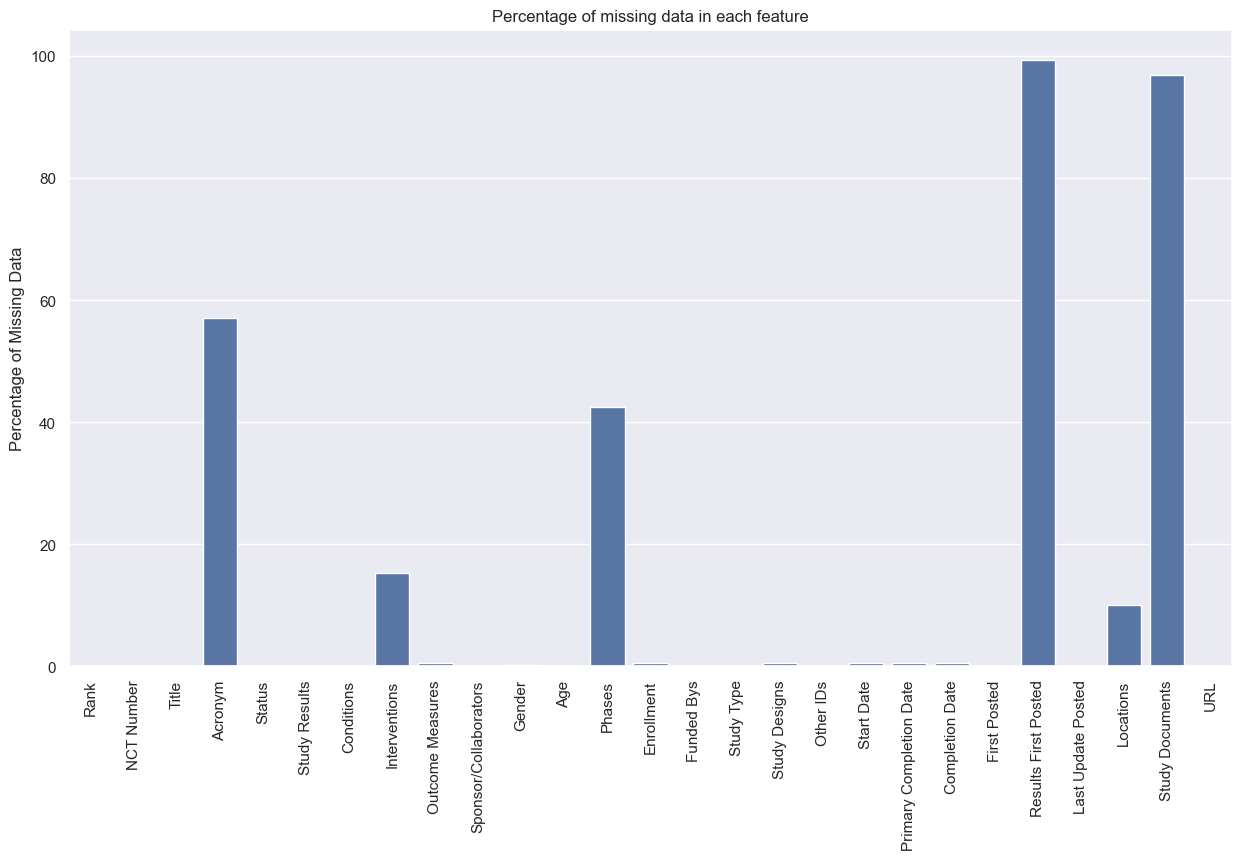

In [16]:
visualize_data(missing_data, 'Percentage of missing data in each feature')

In [17]:
# Drop Columns
df.drop(columns=['Results First Posted', 'Study Documents'], inplace=True, axis=1)
# df = df.drop(columns=['Acronym','Study Documents'])

In [18]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations', 'URL'],
      dtype='object')

In [19]:
# Drop duplicate rows
print(f"Shape before dropping duplicates data {df.shape}")

Shape before dropping duplicates data (5783, 25)


In [20]:
df.drop_duplicates(inplace = True)

In [21]:
print(f"Shape after dropping duplicates data {df.shape}")

Shape after dropping duplicates data (5783, 25)


In [22]:
# Drop rows that have less than 10 non-null values
print(f"shape before dropping Null rows {df.shape}")

shape before dropping Null rows (5783, 25)


In [23]:
df.dropna(thresh=10, axis = 0, inplace = True)

In [24]:
print(f"shape after dropping Null rows {df.shape}")

shape after dropping Null rows (5783, 25)


In [25]:
missing_data

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                    57.115684
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Results First Posted       99.377486
Last Update Posted          0.000000
Locations                  10.115857
Study Documents            96.852845
URL                         0.000000
d

In [26]:
# We can extract a new feature form the location which is the country where the study hold
countries = [str(df.Locations.iloc[i]).split(',')[-1] for i in range(df.shape[0])]

In [27]:
df['Country'] = countries

In [29]:
countries[:25]

[' France',
 ' Colombia',
 ' San Marino',
 ' Hong Kong',
 ' France',
 ' Vietnam',
 ' United States',
 ' India',
 ' Israel',
 ' Chile',
 ' United States',
 ' Italy',
 ' United States',
 ' Italy',
 ' Israel',
 ' France',
 ' France',
 ' Hong Kong',
 ' Italy',
 ' United Kingdom',
 ' Italy',
 ' United Arab Emirates',
 ' France',
 ' Italy',
 ' Norway']

In [30]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations', 'URL', 'Country'],
      dtype='object')

In [31]:
df.shape

(5783, 26)

In [32]:
df.Country.value_counts()[:35]

Country
 United States          1267
 France                  647
nan                      585
 United Kingdom          306
 Italy                   235
 Spain                   234
 Turkey                  219
 Canada                  202
 Egypt                   192
 China                   171
 Brazil                  137
 Germany                 128
 Belgium                  91
 Mexico                   88
 Switzerland              76
 Russian Federation       69
 Sweden                   57
 Denmark                  56
 Israel                   56
 India                    55
 Pakistan                 53
 Argentina                47
 Netherlands              46
 Norway                   38
 Hong Kong                36
 Colombia                 33
 Republic of              31
 Austria                  29
 Poland                   29
 Singapore                29
 Saudi Arabia             27
 Australia                26
 Greece                   26
 Islamic Republic of      23
 South

In [33]:
# Now we need to clssify the missing data to one of these categories
# 1) Missing Completely At Random (MCAR)
# 2) Missing At Random (MAR)
# 3) Not Missing At Random (NMAR)

In [34]:
# Let's start with Acronym
print(f"Number of unique values is {df.Acronym.nunique()} \n")

Number of unique values is 2338 



In [35]:
df.Acronym.value_counts()

Acronym
COVID-19        47
PROTECT          7
CORONA           6
RECOVER          5
SCOPE            5
                ..
ASD              1
VICO             1
LICORNE          1
LOSVID           1
MindMyMindFU     1
Name: count, Length: 2338, dtype: int64

In [36]:
# Find the relation between null values in Acronym and Countries
(df.Acronym.isnull().groupby(df.Country).mean().sort_values(ascending = False) * 100)[:60]

Country
 Iraq                      100.000000
 Belarus                   100.000000
 Rwanda                    100.000000
 South Sudan               100.000000
 Cambodia                  100.000000
 Bulgaria                  100.000000
 Cyprus                    100.000000
 Bosnia and Herzegovina    100.000000
 Guinea-Bissau             100.000000
 Dominican Republic        100.000000
 Ecuador                   100.000000
 North Macedonia           100.000000
 Bahrain                   100.000000
 Azerbaijan                100.000000
 Uruguay                   100.000000
 Uzbekistan                100.000000
 Kyrgyzstan                100.000000
 Cape Verde                100.000000
 Republic of                96.774194
 Taiwan                     93.750000
 Singapore                  93.103448
 Japan                      88.888889
 Kuwait                     87.500000
 China                      87.134503
 Turkey                     86.757991
 Ukraine                    85.714286
 Mal

In [37]:
# Impute by a missing Indicator
# df['Acronym'].fillna('Unknown', inplace=True)
df.Acronym = df.Acronym.fillna("Missing Acronym")

In [38]:
# Detecting (Percentage) missing Data
df.isnull().mean() * 100

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                     0.000000
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Last Update Posted          0.000000
Locations                  10.115857
URL                         0.000000
Country                     0.000000
dtype: float64

In [39]:
# Impute Interventions, Phases, Locations by missing Category
categorical_features = df.select_dtypes(include = object).columns

In [40]:
features = categorical_features[df[categorical_features].isnull().mean()>0]

In [41]:
for feature in features:
    df[feature] = df[feature].fillna(f"Missing {feature}")

In [42]:
# Now detecting (percentage) missing data
df.isnull().mean() * 100

Rank                       0.00000
NCT Number                 0.00000
Title                      0.00000
Acronym                    0.00000
Status                     0.00000
Study Results              0.00000
Conditions                 0.00000
Interventions              0.00000
Outcome Measures           0.00000
Sponsor/Collaborators      0.00000
Gender                     0.00000
Age                        0.00000
Phases                     0.00000
Enrollment                 0.58793
Funded Bys                 0.00000
Study Type                 0.00000
Study Designs              0.00000
Other IDs                  0.00000
Start Date                 0.00000
Primary Completion Date    0.00000
Completion Date            0.00000
First Posted               0.00000
Last Update Posted         0.00000
Locations                  0.00000
URL                        0.00000
Country                    0.00000
dtype: float64

In [43]:
# Now the time to handle the missing data for enrollment
# Check the skewness
df.Enrollment.skew()

34.06593382031148

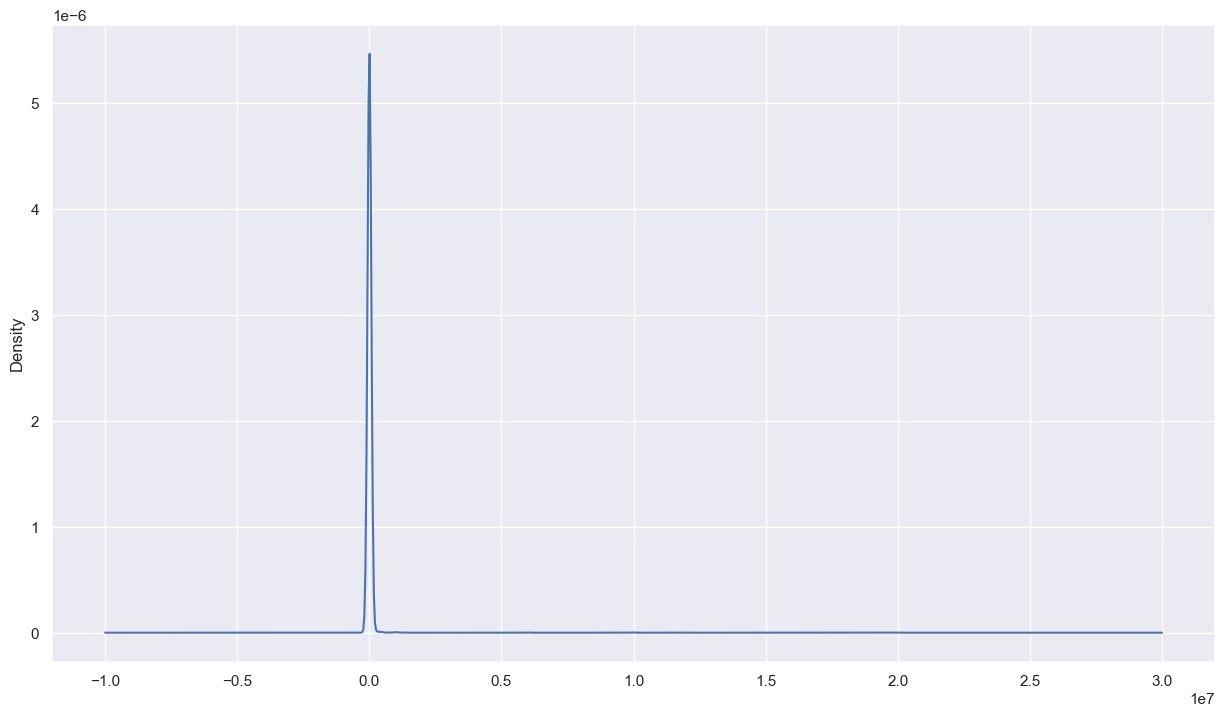

In [44]:
# The value of skewness is 34 which means that we this feature isn't normally distributed
# Plotting the distribution of the enrollment
df.Enrollment.plot(kind = 'kde')
plt.show()

In [45]:
# Now we will impute by the median
# Some Statistical values for the Enrollment Column
min_Value = df.Enrollment.min()
max_Value = df.Enrollment.max()
mean_Value = df.Enrollment.mean()
median_Value = df.Enrollment.median()
std_Value = df.Enrollment.std()

print(f"the min value is {min_Value}\n\
The max value is {max_Value}\n\
The mean is {mean_Value}\n\
The Median is {median_Value}\n\
Standard Deviation is {std_Value}")

the min value is 0.0
The max value is 20000000.0
The mean is 18319.48860671421
The Median is 170.0
Standard Deviation is 404543.7287841073


In [46]:
# Using median to impute missing values
df.Enrollment = df.Enrollment.fillna(median_Value)

In [47]:
# Now detecting (percentage) Missing Data
df.isnull().mean() * 100

Rank                       0.0
NCT Number                 0.0
Title                      0.0
Acronym                    0.0
Status                     0.0
Study Results              0.0
Conditions                 0.0
Interventions              0.0
Outcome Measures           0.0
Sponsor/Collaborators      0.0
Gender                     0.0
Age                        0.0
Phases                     0.0
Enrollment                 0.0
Funded Bys                 0.0
Study Type                 0.0
Study Designs              0.0
Other IDs                  0.0
Start Date                 0.0
Primary Completion Date    0.0
Completion Date            0.0
First Posted               0.0
Last Update Posted         0.0
Locations                  0.0
URL                        0.0
Country                    0.0
dtype: float64

In [48]:
df.head()

Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Infection   
2                                            covid19   
3                                              COVID   
4  Maternal Fetal Infection Transmission|COVID-19...   

                                       Interventions  \
0   Diagnostic Test: ID Now™ COVID-19 Screening Test   
1    Drug: Drug COVID19-0001-USR|Drug: normal saline   
2  Other: Lung CT scan analysis in COVID-19 patients   
3          Diagnostic Test: COVID 19 Diagnostic Test   
4  Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...   

                                    Outcome Measures  \
0  Evaluate the diagnostic performance of the ID ...   
1  Change on viral load results from baseline aft...   
2  A qualitative analysis of parenchymal lung dam...   
3  Proportion of asymptomatic subjects|Proportion...   
4  COVID-19 by positive PCR in cord blood and / o...   

                               Sponsor/Collaborators  ...  \
0              Groupe Hospitalier Paris Saint Joseph  ...   
1                         United Medical Specialties  ...   
2                       University of Milano Bicocca  ...   
3                    Hong Kong Sanatorium & Hospital  ...   
4  Centre Hospitalier Régional d'Orléans|Centre d...  ...   

                                       Study Designs         Other IDs  \
0  Allocation: N/A|Intervention Model: Single Gro...       COVID-IDNow   
1  Allocation: Randomized|Intervention Model: Par...  COVID19-0001-USR   
2  Observational Model: Cohort|Time Perspective: ...       TAC-COVID19   
3  Observational Model: Cohort|Time Perspective: ...        RC-2020-08   
4  Observational Model: Cohort|Time Perspective: ...      CHRO-2020-10   

         Start Date  Primary Completion Date   Completion Date  \
0  November 9, 2020        December 22, 2020    April 30, 2021   
1  November 2, 2020        December 15, 2020  January 29, 2021   
2       May 7, 2020            June 15, 2021     June 15, 2021   
3      May 25, 2020            July 31, 2020   August 31, 2020   
4       May 5, 2020                 May 2021          May 2021   

       First Posted Last Update Posted  \
0     March 8, 2021      March 8, 2021   
1  October 20, 2020   October 20, 2020   
2      May 20, 2020   November 9, 2020   
3      June 4, 2020       June 4, 2020   
4      May 20, 2020       June 4, 2020   

                                           Locations  \
0  Groupe Hospitalier Paris Saint-Joseph, Paris, ...   
1       Cimedical, Barranquilla, Atlantico, Colombia   
2  Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...   
3  Hong Kong Sanatorium & Hospital, Hong Kong, Ho...   
4                       CHR Orléans, Orléans, France   

                                           URL      Country  
0  https://ClinicalTrials.gov/show/NCT04785898       France  
1  https://ClinicalTrials.gov/show/NCT04595136     Colombia  
2  https://ClinicalTrials.gov/show/NCT04395482   San Marino  
3  https://ClinicalTrials.gov/show/NCT04416061    Hong Kong  
4  https://ClinicalTrials.gov/show/NCT043

### *Data Visualizations*

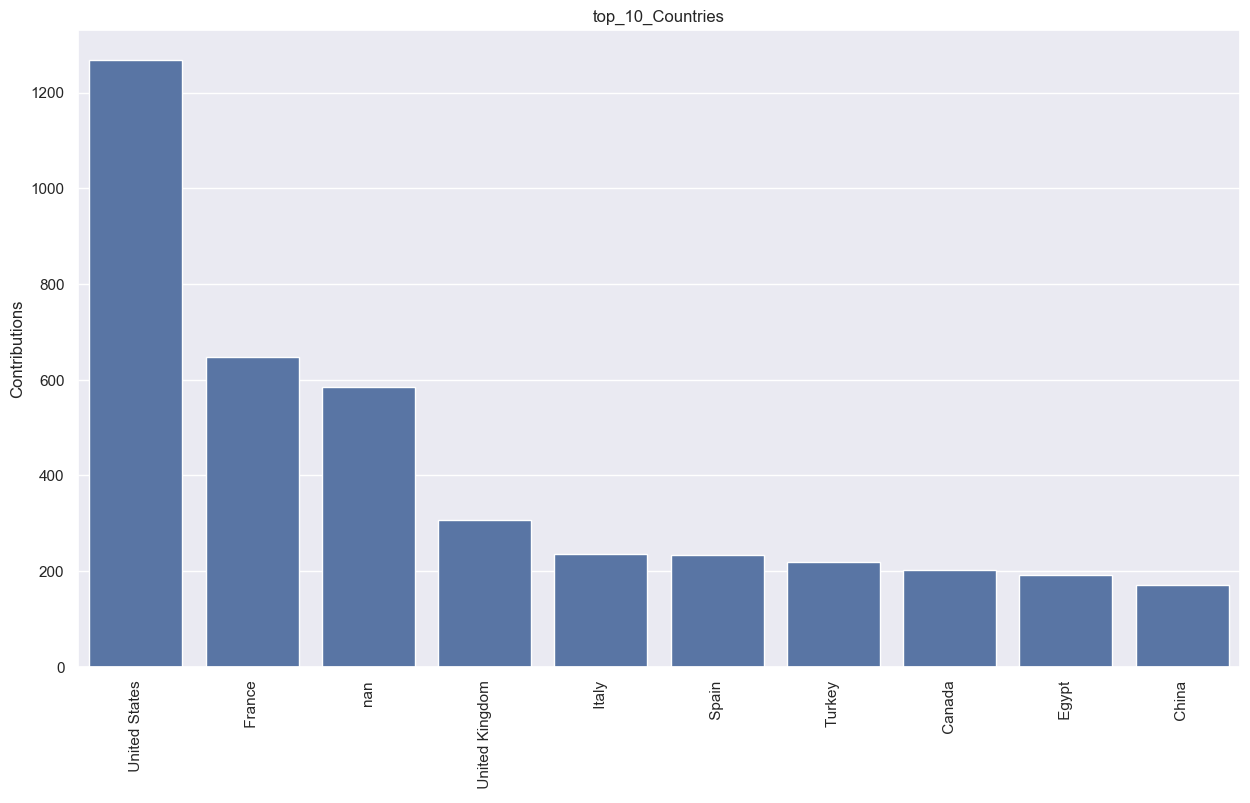

In [49]:
# Get Countries with highest Contributions
top_10_Countries = df.Country.value_counts()[:10]
visualize_data(top_10_Countries, caption = 'top_10_Countries', ylabel = 'Contributions')

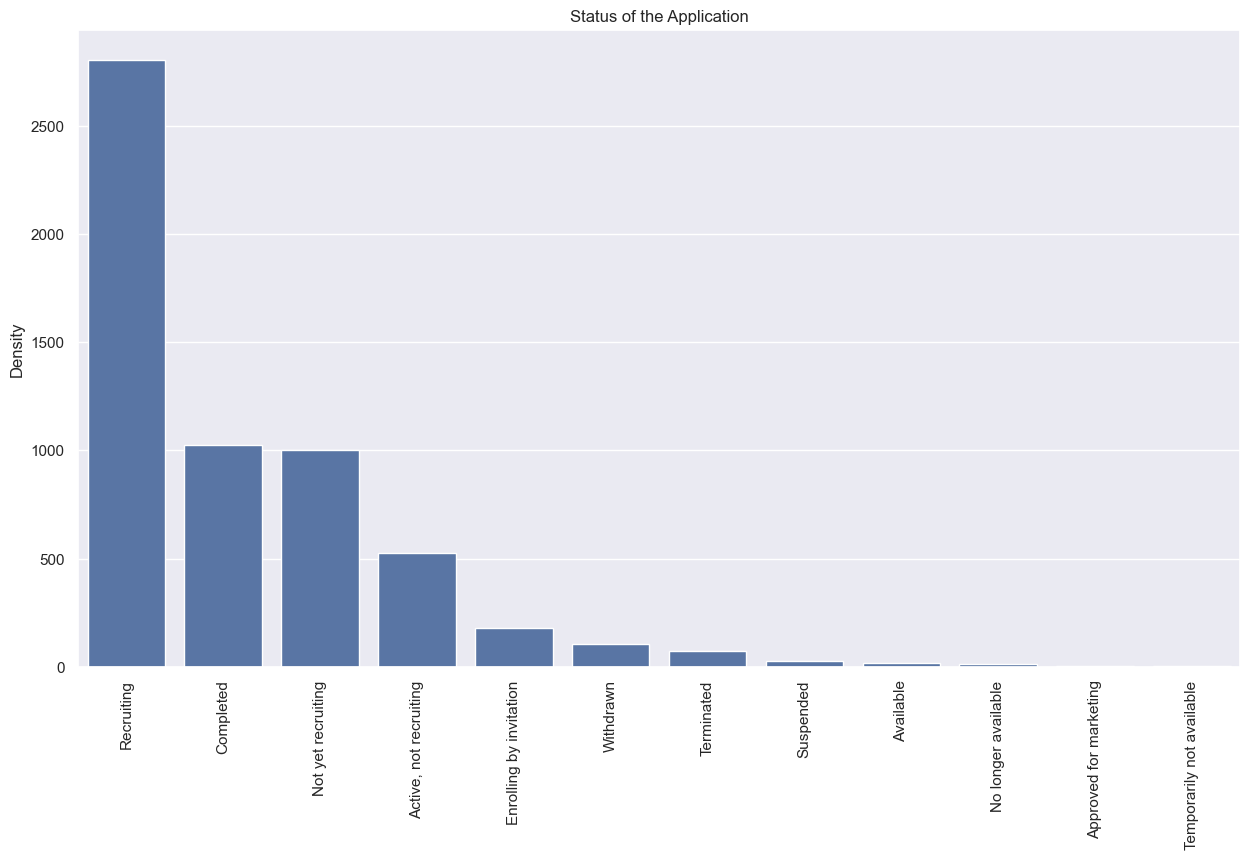

In [50]:
# Status of the Application
status = df.Status.value_counts()
visualize_data(status, caption = 'Status of the Application', ylabel = 'Density')

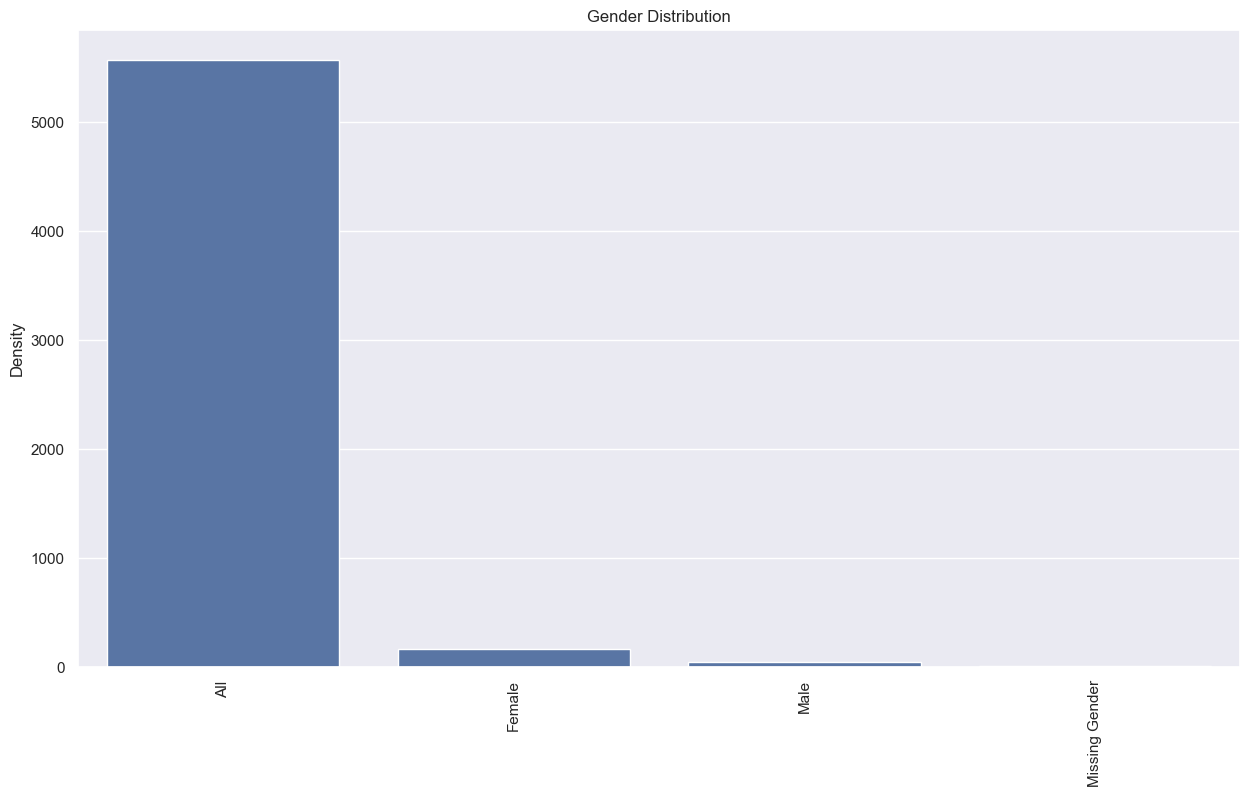

In [51]:
# Gender Visualization
gender = df.Gender.value_counts()
visualize_data(gender, caption = 'Gender Distribution', ylabel = 'Density')

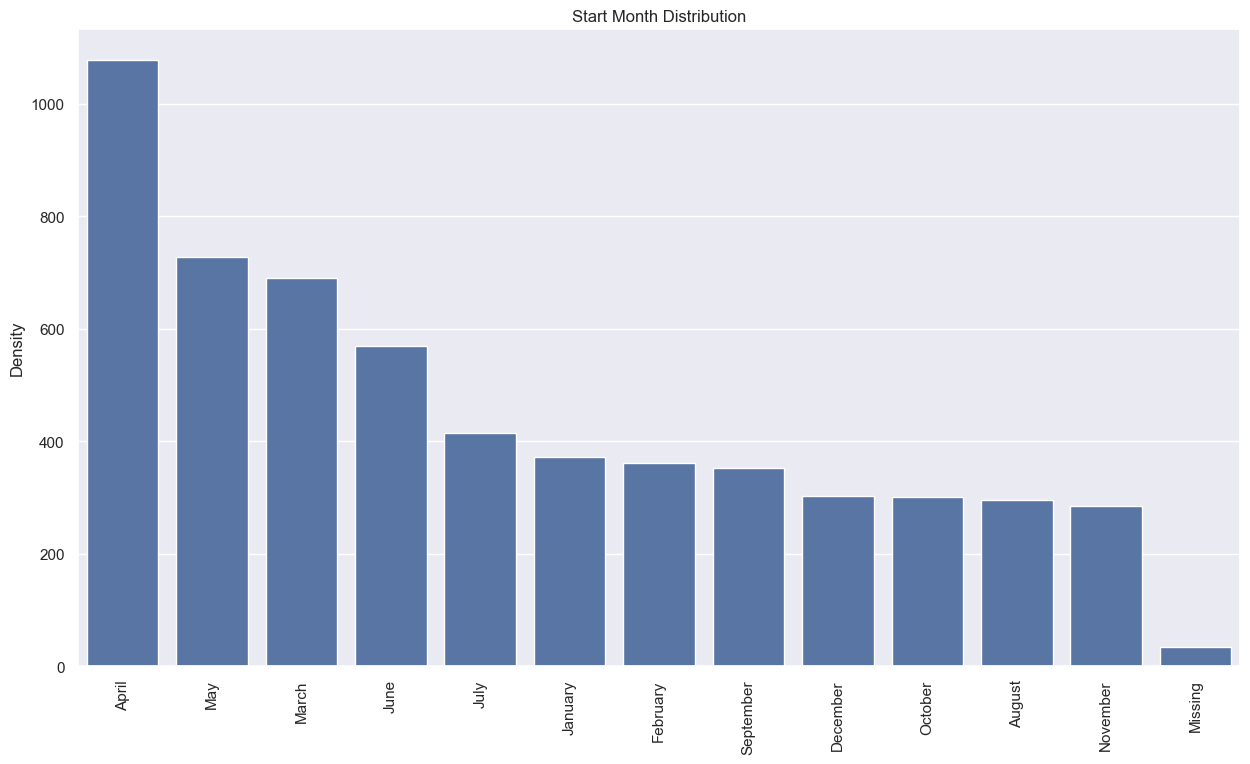

In [52]:
# which month has highest start
start_month = pd.Series([str(df['Start Date'].iloc[i]).split(' ')[0] for i in range (df.shape[0])])
start_month_distribution = start_month.value_counts()
visualize_data(start_month_distribution, caption = 'Start Month Distribution', ylabel ='Density')

In [53]:
print(f"The shape of the data frame is {df.shape}")
print(f"Nunique in NCT Number is {df['NCT Number'].nunique()}")
print(f"Nunique in URL is {df.URL.nunique()}")

The shape of the data frame is (5783, 26)
Nunique in NCT Number is 5783
Nunique in URL is 5783


### *Unvariate Analysis*
- Analyze each column individually to understand the distribution and key Characteristics.

In [54]:
# Status Distribution: Anlyze the status of clinical trials (e.g. Completed, Ongoing)
df['Status'].value_counts()

Status
Recruiting                   2805
Completed                    1025
Not yet recruiting           1004
Active, not recruiting        526
Enrolling by invitation       181
Withdrawn                     107
Terminated                     74
Suspended                      27
Available                      19
No longer available            12
Approved for marketing          2
Temporarily not available       1
Name: count, dtype: int64

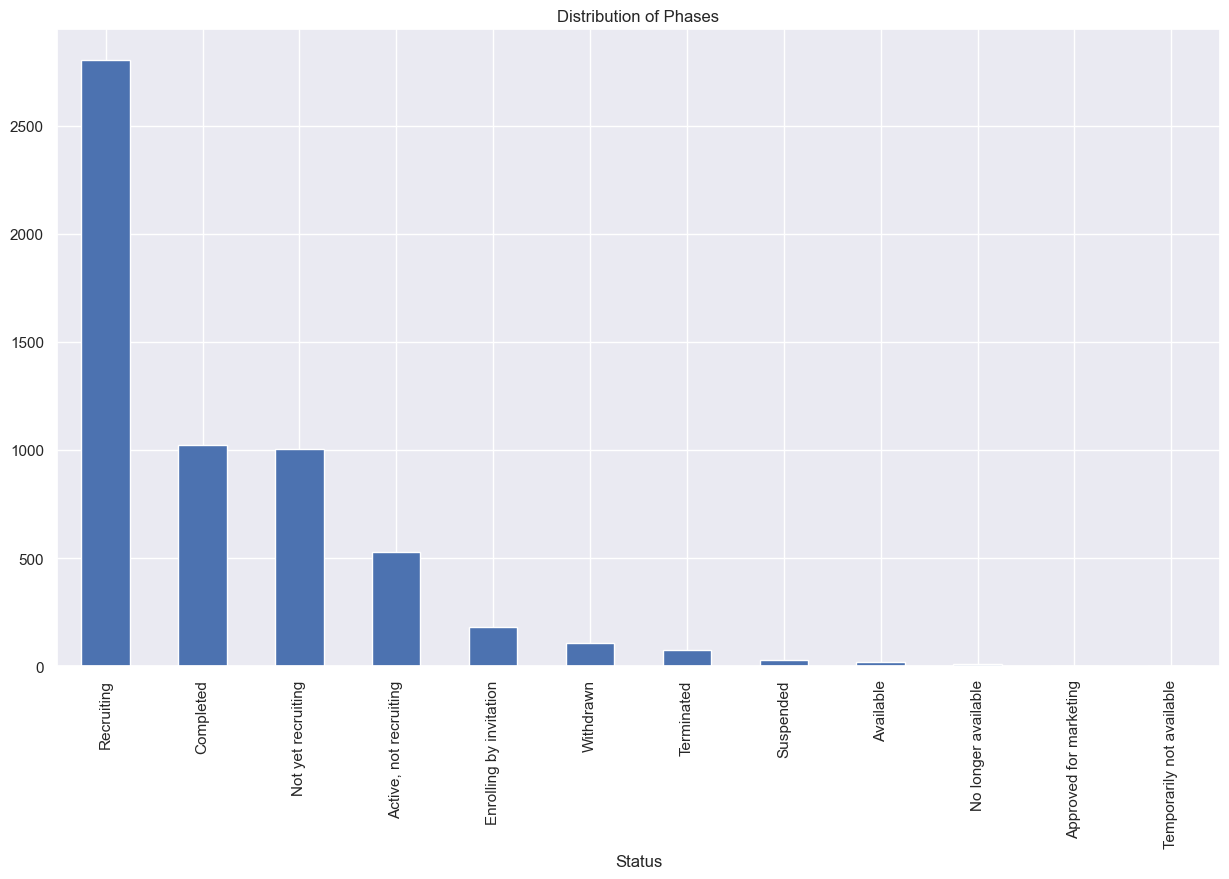

In [55]:
df['Status'].value_counts().plot(kind='bar', title='Distribution of Phases')
plt.show()

In [56]:
# Phase Distribution: Understand the distribution of trial Phases.
df['Phases'].value_counts()

Phases
Missing Phases     2461
Not Applicable     1354
Phase 2             685
Phase 3             450
Phase 1             234
Phase 2|Phase 3     200
Phase 1|Phase 2     192
Phase 4             161
Early Phase 1        46
Name: count, dtype: int64

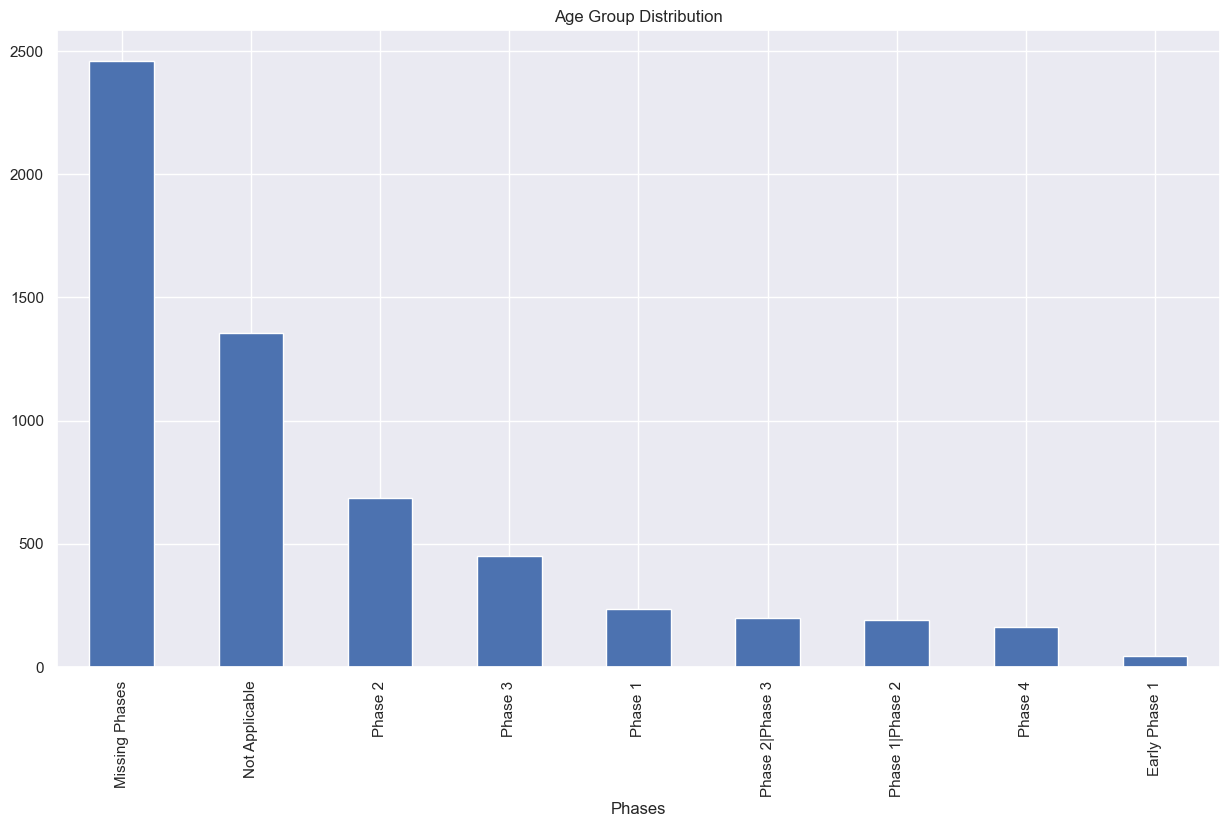

In [57]:
df['Phases'].value_counts().plot(kind='bar', title='Age Group Distribution')
plt.show()

In [58]:
# Age Group Analysis: Analyze the distribution of age groups
df['Age'].value_counts()

Age
18 Years and older   (Adult, Older Adult)           2885
Child, Adult, Older Adult                            486
18 Years to 80 Years   (Adult, Older Adult)          221
18 Years to 65 Years   (Adult, Older Adult)          155
18 Years to 75 Years   (Adult, Older Adult)          135
                                                    ... 
15 Years to 45 Years   (Child, Adult)                  1
1 Month to 30 Years   (Child, Adult)                   1
21 Years to 40 Years   (Adult)                         1
11 Years and older   (Child, Adult, Older Adult)       1
8 Years to 20 Years   (Child, Adult)                   1
Name: count, Length: 417, dtype: int64

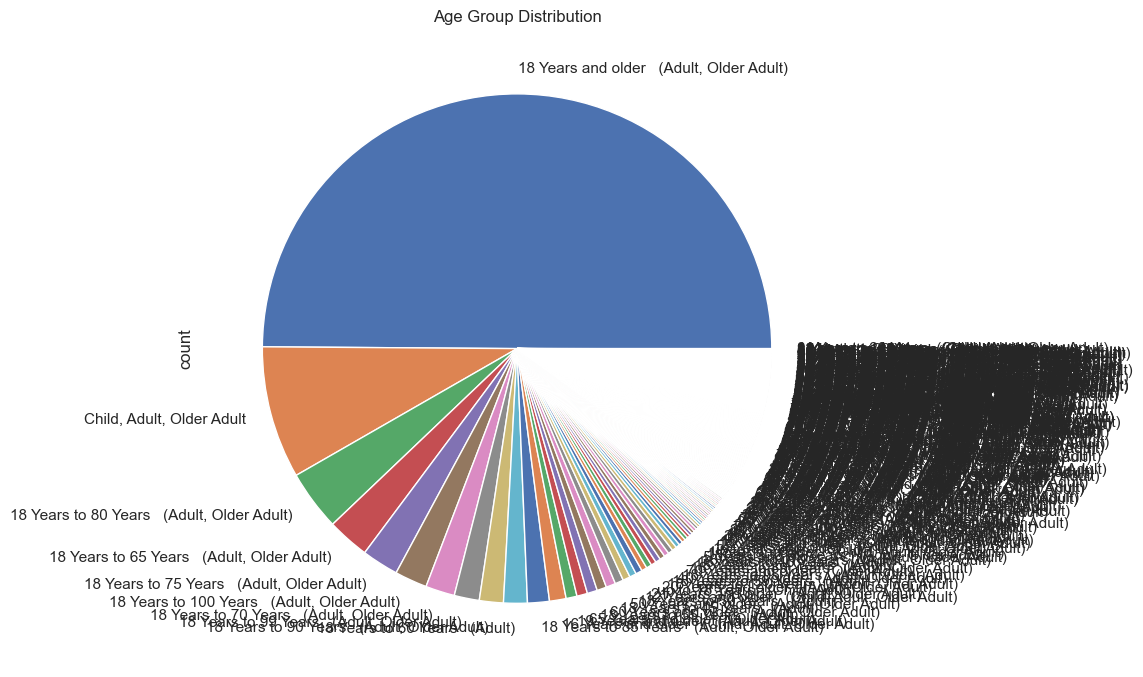

In [59]:
df['Age'].value_counts().plot(kind='pie', title='Age Group Distribution')
plt.show()

### *Bivariate Analysis*
- Explore relationships between different variables.

In [60]:
# Status vs Phases: Explore how trial phases are distributed across different statuses.
status_phase = pd.crosstab(df['Status'],df['Phases'])

In [61]:
status_phase

Phases                     Early Phase 1  Missing Phases  Not Applicable  \
Status                                                                     
Active, not recruiting                 7             175             111   
Approved for marketing                 0               2               0   
Available                              0              19               0   
Completed                              3             565             226   
Enrolling by invitation                4              96              54   
No longer available                    0              12               0   
Not yet recruiting                     5             350             282   
Recruiting                            22            1224             647   
Suspended                              2               2               2   
Temporarily not available              0               1               0   
Terminated                             0               4              13   
Withdrawn                              3              11              19   

Phases                     Phase 1  Phase 1|Phase 2  Phase 2  Phase 2|Phase 3  \
Status                                                                          
Active, not recruiting          44               26       81               15   
Approved for marketing           0                0        0                0   
Available                        0                0        0                0   
Completed                       38               17       78               20   
Enrolling by invitation          1                3       10                1   
No longer available              0                0        0                0   
Not yet recruiting              42               46      114               46   
Recruiting                      98               92      343              102   
Suspended                        0                2        4                4   
Temporarily not available        0                0        0                0   
Terminated                       4                2       25                6   
Withdrawn                        7                4       30                6   

Phases                     Phase 3  Phase 4  
Status                                       
Active, not recruiting          59        8  
Approved for marketing           0        0  
Available                        0        0  
Completed                       56       22  
Enrolling by invitation          6        6  
No longer available              0        0  
Not yet recruiting              89       30  
Recruiting                     196       81  
Suspended                        9        2  
Temporarily not available        0        0  
Terminated                      15        5  
Withdrawn                       20        7

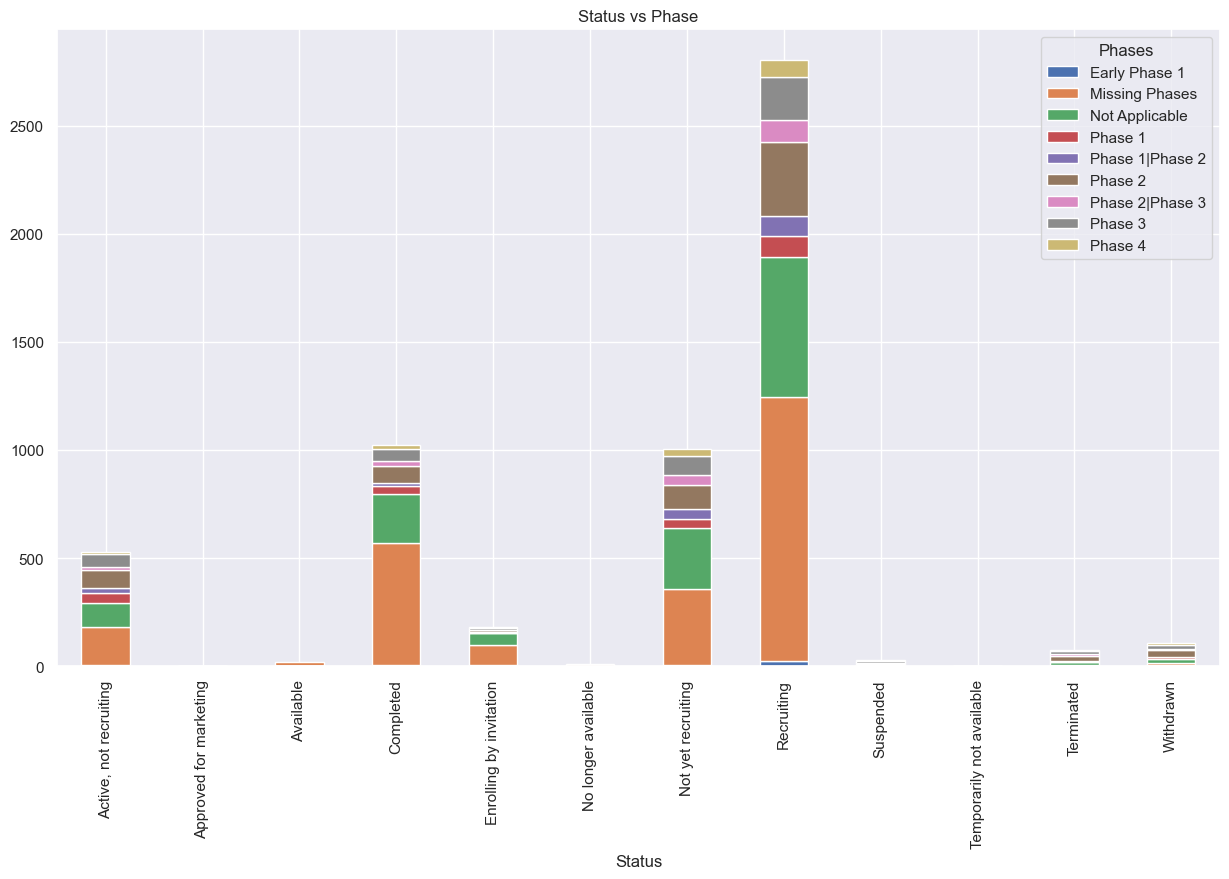

In [62]:
status_phase.plot(kind='bar', stacked=True, title='Status vs Phase')
plt.show()

In [63]:
# Condition vs Outcomes Measures: Understand the common outcome measure for different conditions.
conditions_outcomes = df.groupby('Conditions')['Outcome Measures'].apply(lambda x: ', '.join(x)).reset_index()

In [64]:
conditions_outcomes

Conditions  \
0                                2019 Novel Coronavirus   
1                      2019 Novel Coronavirus Infection   
2     2019 Novel Coronavirus Infection|COVID-19 Viru...   
3                      2019 Novel Coronavirus Pneumonia   
4             2019 Novel Coronavirus Pneumonia|COVID-19   
...                                                 ...   
3062                  the Lung Complication of COVID-19   
3063  the Prognostic Value of Ferritin|Glycosylated ...   
3064  the Study Focus on the Uses of Telephone and O...   
3065  the Use of Modern Technology Applications in H...   
3066  to Predict an Unfavorable Evolution of Covid-1...   

                                       Outcome Measures  
0     Proportion of participants who improve by at l...  
1     new-onset COVID-19|Number of Participants with...  
2     Number of participants with treatment emergent...  
3     Clinical recovery time|Complete fever time|Cou...  
4     Pneumonia severity index|Oxygenation index (Pa...  
...                                                 ...  
3062  lung injury score|Angiotensin 1-7 (Ang 1-7) ch...  
3063  assessment of the prognostic value of ferritin...  
3064  - To provide an overview about the pros and co...  
3065  rate of reassurance delivered from doctors to ...  
3066  Need of mechanical ventilation, transfer to an...  

[3067 rows x 2 columns]

### *Time Series Analysis*
- Analyze the trends over time, such as the number of trials started over the months

In [65]:
# Convert Date Columns to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'],errors='coerce')

In [66]:
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'],errors='coerce')

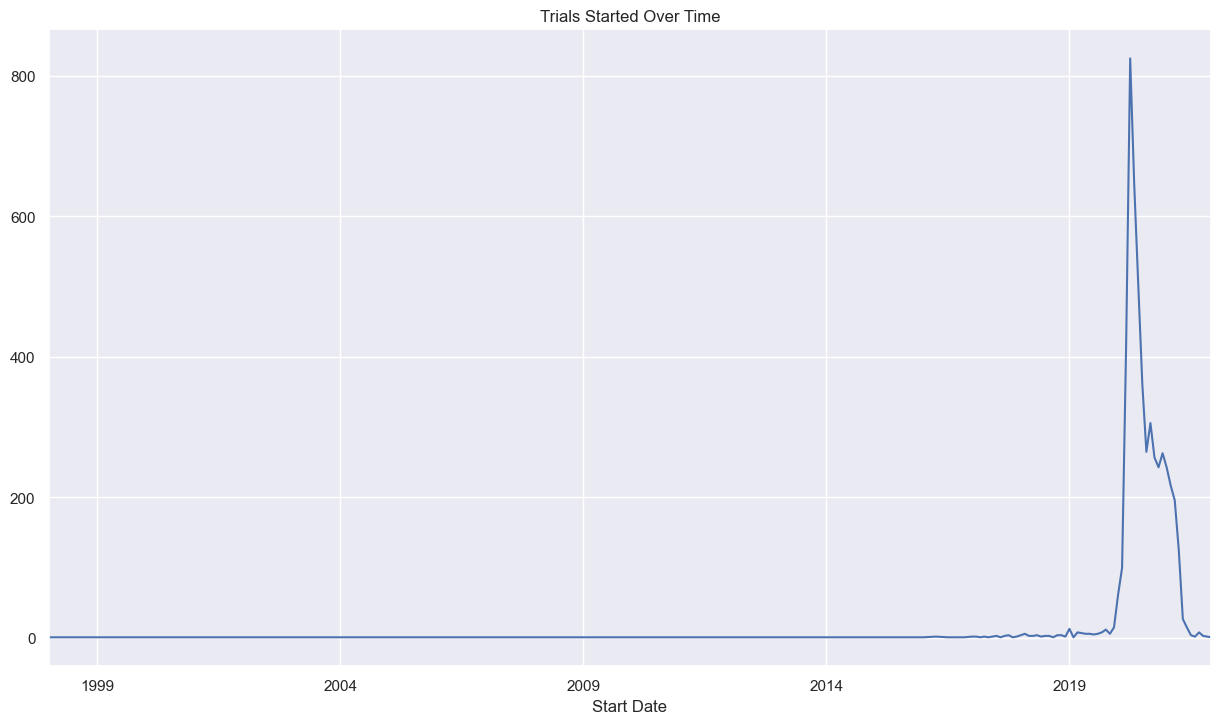

In [67]:
# plot the number of trials started over time
df['Start Date'].dt.to_period('M').value_counts().sort_index().plot(kind='line',title='Trials Started Over Time')
plt.show()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Rank                     5783 non-null   int64         
 1   NCT Number               5783 non-null   object        
 2   Title                    5783 non-null   object        
 3   Acronym                  5783 non-null   object        
 4   Status                   5783 non-null   object        
 5   Study Results            5783 non-null   object        
 6   Conditions               5783 non-null   object        
 7   Interventions            5783 non-null   object        
 8   Outcome Measures         5783 non-null   object        
 9   Sponsor/Collaborators    5783 non-null   object        
 10  Gender                   5783 non-null   object        
 11  Age                      5783 non-null   object        
 12  Phases                   5783 non-

### *Status of studies*
#### Status of the studies can be either of the following:
- *Not yet recruiting*: The study has not started recruiting participants.
- *Recruiting*: The study is currently recruiting participants.
- *Enrolling by invitation*: The study is selecting its participants from a population, or group of people, decided on by the researchers in advance.   These studies are not open to everyone who meets the eligibility criteria but only to people in that particular population, who are specifically invited to participate.
- *Active, not recruiting*: The study is ongoing, and participants are receiving an intervention or being examined, but potential participants are not currently being recruited or enrolled.
- *Suspended*: The study has stopped early but may start again.
- *Terminated*: The study has stopped early and will not start again. Participants are no longer being examined or treated.
- *Completed*: The study has ended normally, and participants are no longer being examined or treated (that is, the last participant's last visit has occurred).
- *Withdrawn*: The study stopped early, before enrolling its first participant.
- *Unknown*: A study on ClinicalTrials.gov whose last known status was recruiting; not yet recruiting; or active, not recruiting but that has passed its completion date, and the status has not been last verified within the past 2 years.

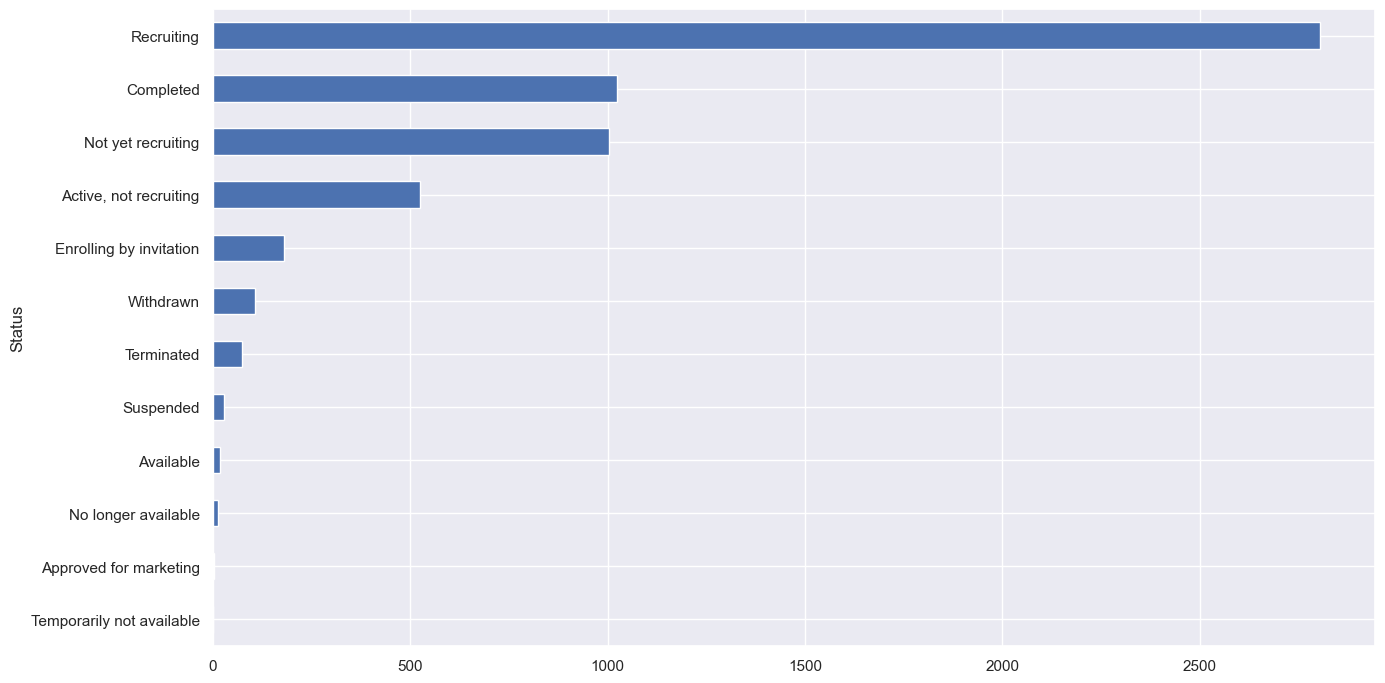

In [69]:
df['Status'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.show()

### *Study Types*
Describes the nature of a clinical study. Study types include :

##### Interventional studies (also called clinical trials),
A type of clinical study in which participants are assigned to groups that receive one or more intervention/treatment (or no intervention) so that researchers can evaluate the effects of the interventions on biomedical or health-related outcomes. The assignments are determined by the study's protocol. Participants may receive diagnostic, therapeutic, or other types of interventions.

##### Observational studies (including patient registries),
A type of clinical study in which participants are identified as belonging to study groups and are assessed for biomedical or health outcomes. Participants may receive diagnostic, therapeutic, or other types of interventions, but the investigator does not assign participants to a specific interventions/treatment. A patient registry is a type of observational study.

##### Expanded access.
A way for patients with serious diseases or conditions who cannot participate in a clinical trial to gain access to a medical product that has not been approved by the U.S. Food and Drug Administration (FDA). Also called compassionate use. There are different expanded access types.

In [70]:
labels = df['Study Type'].value_counts().index
values = df['Study Type'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',insidetextorientation='radial')])
fig.show()

#### *Interventions given*
Intervention refers to the medicinal product (e.g drug, device, vaccine, placebo etc) given to the patients in a study. Let’s see the top five interventions given in these studies.

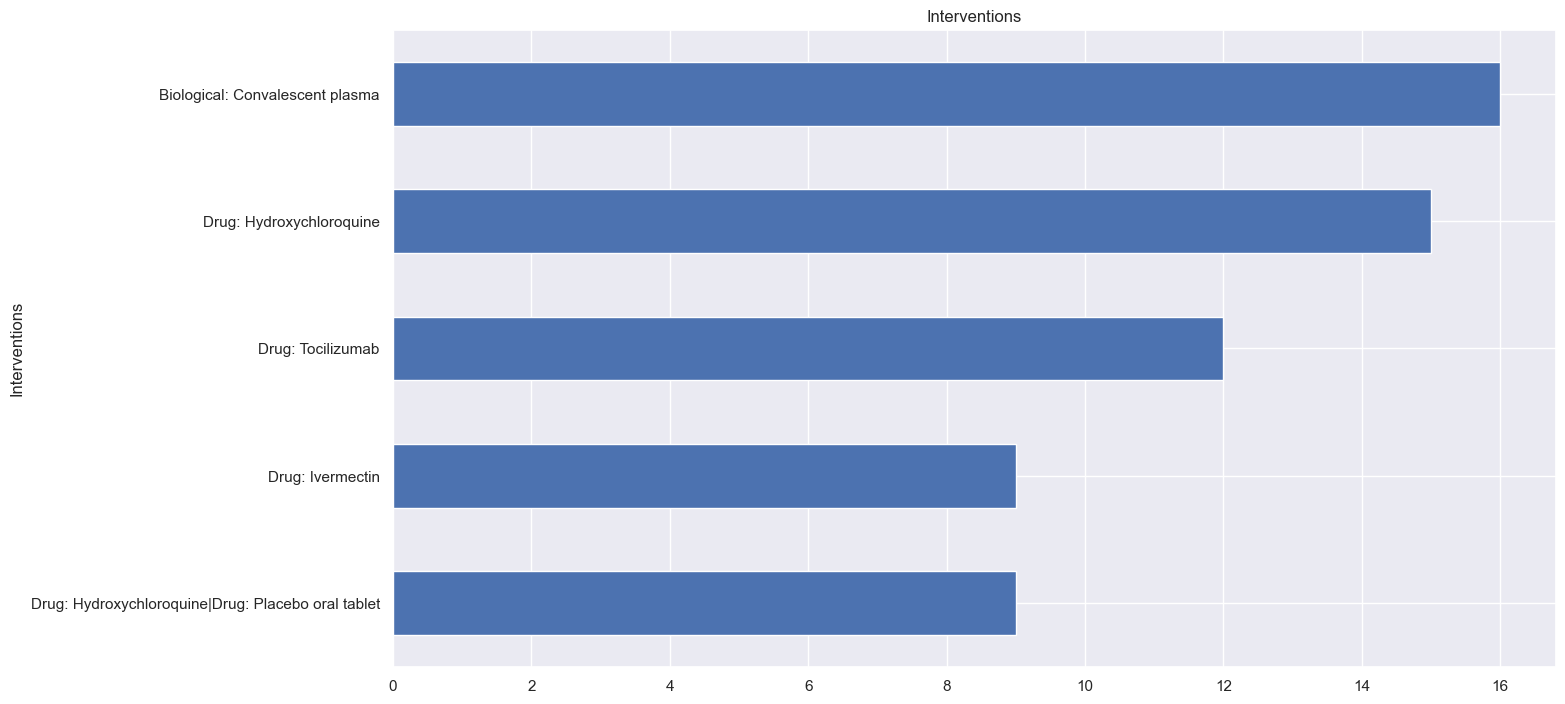

In [71]:
interventional_studies = df[df['Study Type']=='Interventional']
top_interventions = interventional_studies['Interventions'].value_counts().sort_values(ascending=True)[-5:]
top_interventions.plot(kind='barh', title='Interventions')
plt.show()

##### *Which Countries are conducting Interventional Trials?*

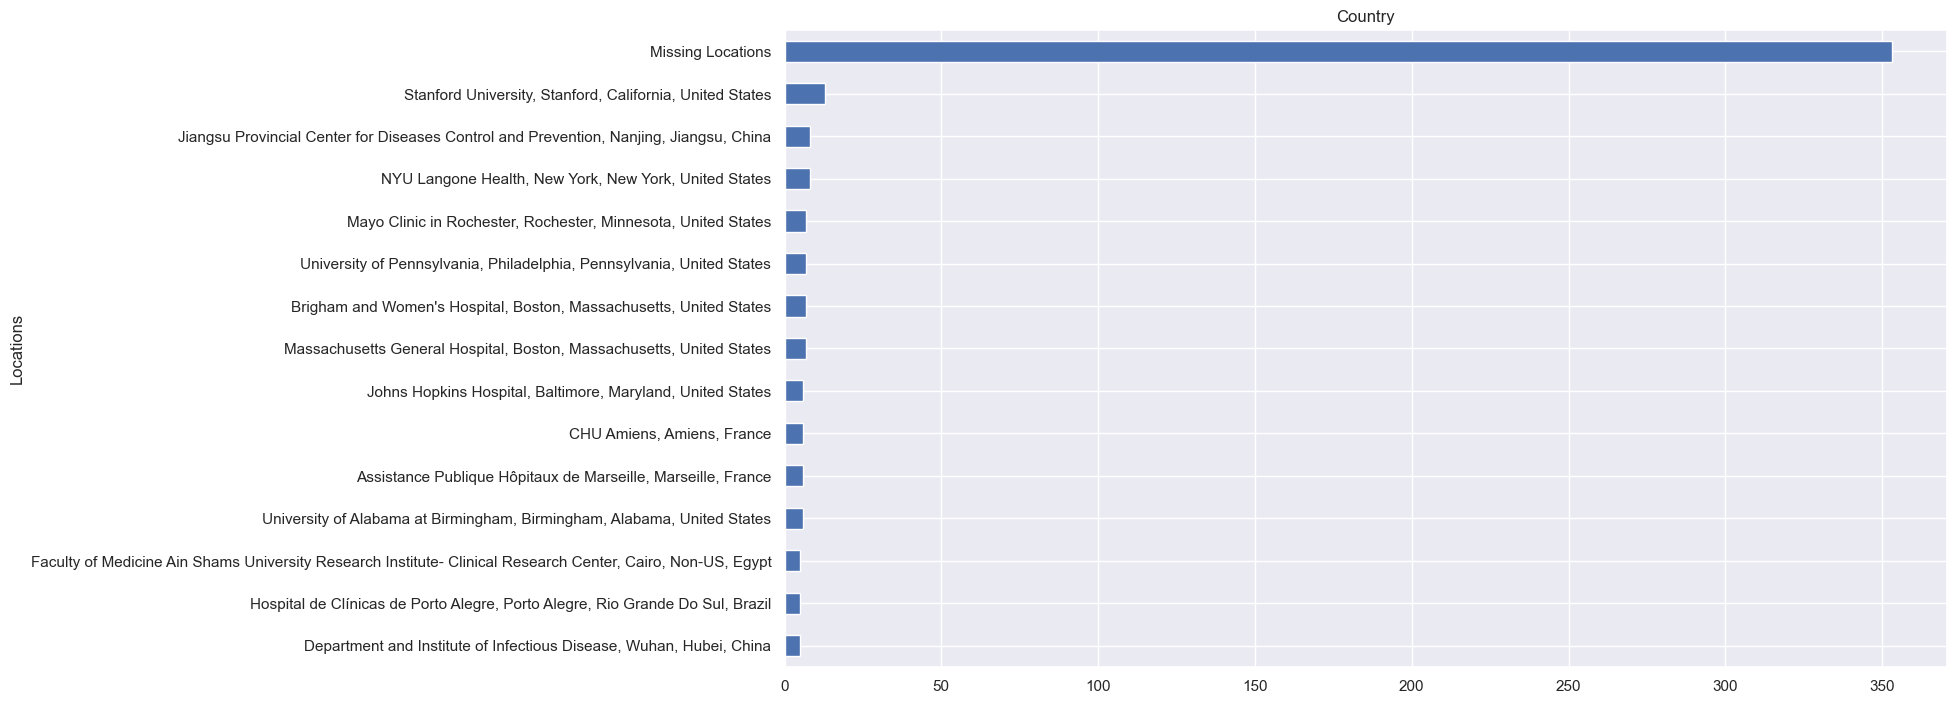

In [72]:
# Top 10 Countries
countries = interventional_studies[interventional_studies['Locations']!='']
country = countries['Locations'].value_counts().sort_values(ascending=True)[-15:]
country.plot(kind='barh', title='Country')
plt.show()

##### *Lead Sponsors for studies*

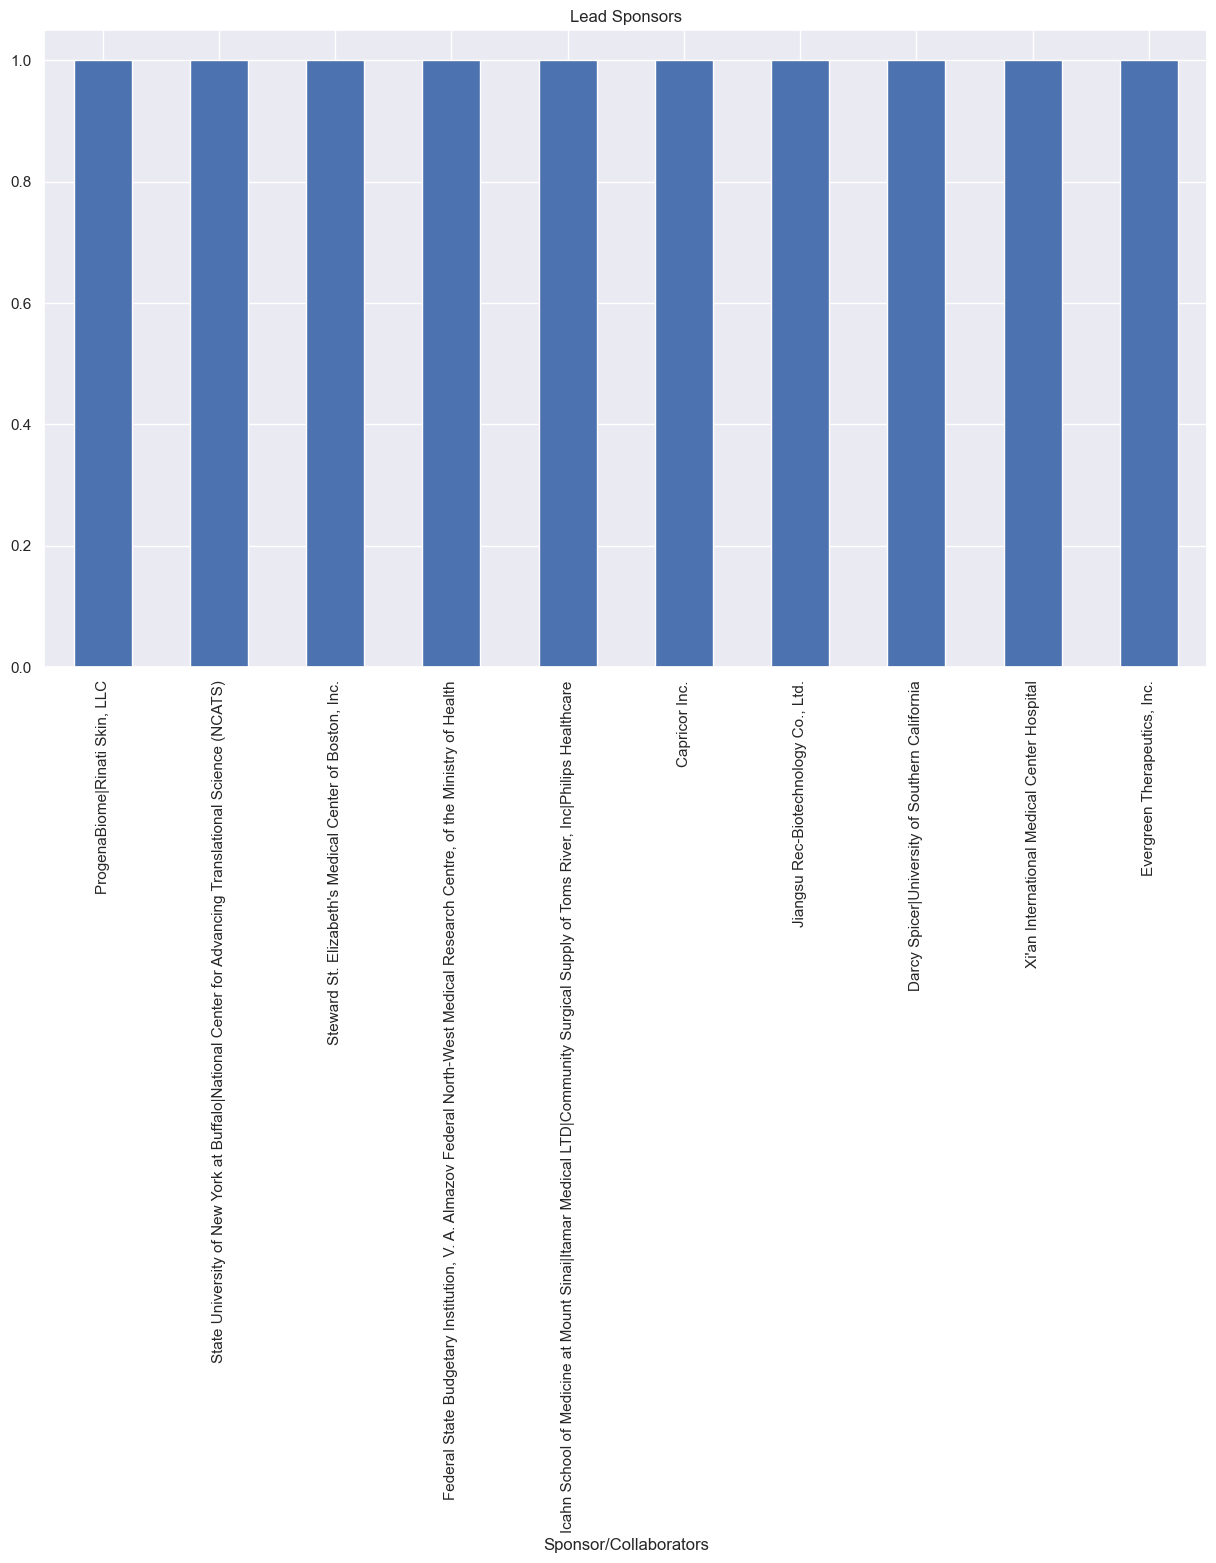

In [73]:
lead_sponsors = interventional_studies['Sponsor/Collaborators'].value_counts().sort_values(ascending=True)[:10]
lead_sponsors.plot(kind='bar', title='Lead Sponsors')
plt.show()

##### *How large are Interventional Trials?*
The size of a trial depend upon the number of patients enrolled.

In [74]:
# Convert to numeric
interventional_studies['Enrollment'] = interventional_studies['Enrollment'].astype(int)
# Remove the trials with recruitment status withdrawn and terminated
enrollment = interventional_studies.loc[(interventional_studies['Status'] != 'Withdrawn') & (interventional_studies['Status'] != 'Terminated')]
bins = [-1, 20, 40, 60, 100, 200, 400, 600, 1000]
group_names = ['< 20', '21-40', '41-60', '61-100', '101-200', '201-400', '401-600', '>600']
categories = pd.cut(enrollment['Enrollment'], bins, labels=group_names)
# Add categories as column in dataframe
enrollment['Category'] = categories
# View value counts
enrollment_counts = enrollment['Category'].value_counts().sort_index(ascending=True)
enrollment_counts

Category
< 20       262
21-40      404
41-60      369
61-100     446
101-200    532
201-400    403
401-600    207
>600       175
Name: count, dtype: int64

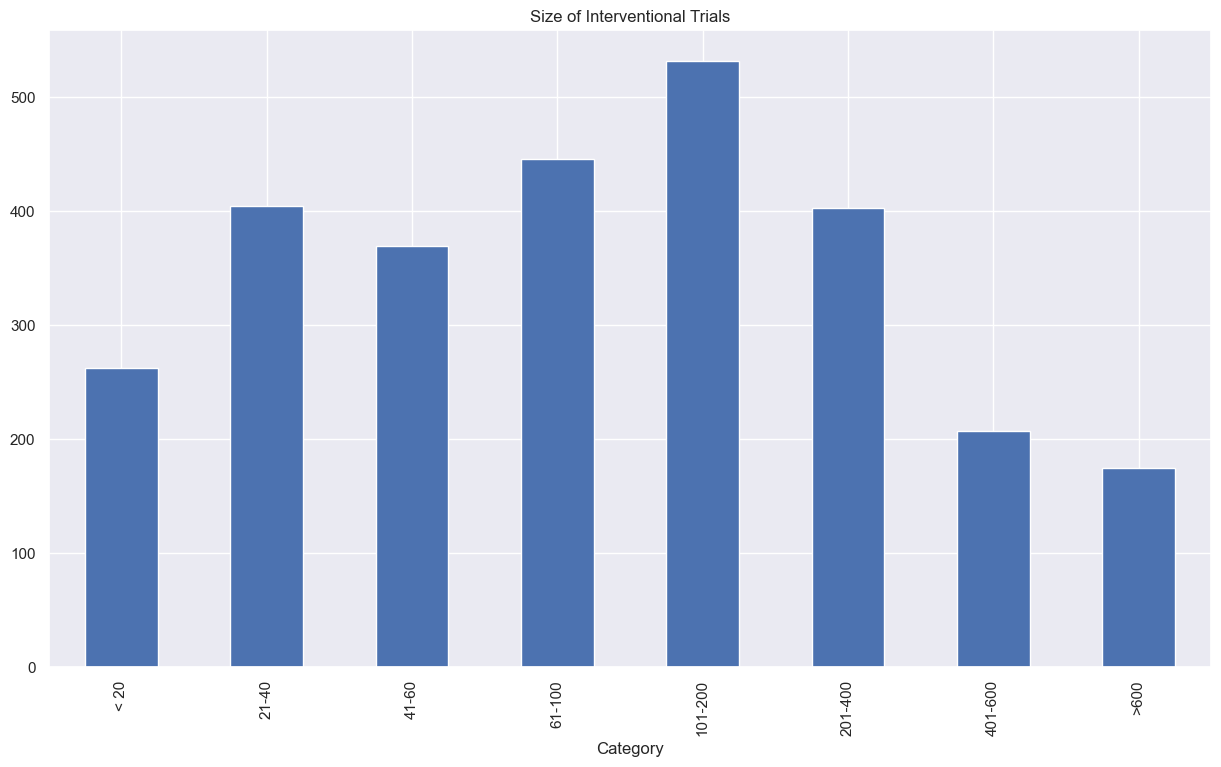

In [75]:
enrollment_counts.plot(kind='bar', title='Size of Interventional Trials')
plt.show()

#### *Clinical trials Phases*

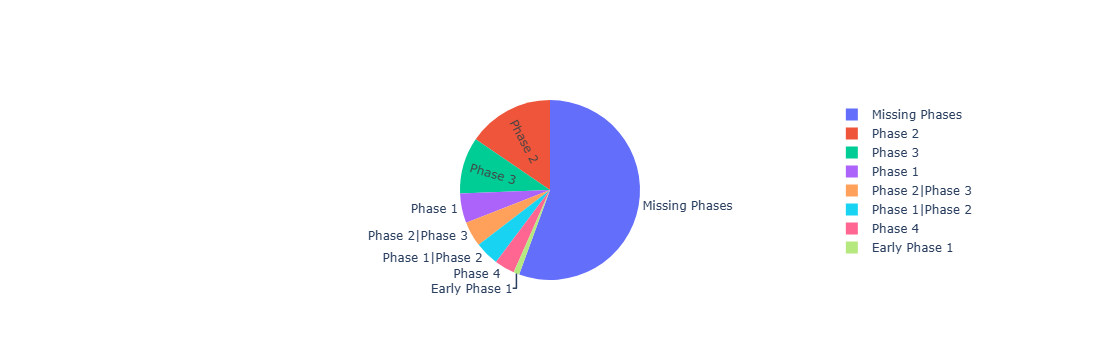

In [76]:
labels = df['Phases'].value_counts().drop('Not Applicable').index
values = df['Phases'].value_counts().drop('Not Applicable').values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label', insidetextorientation='radial')])
fig.show()

In [77]:
# Maximum trials are in Phase 2. However, some trials have also reached Phase 4. 
# Let's now create a word cloud of the title used in Phase 4 trials to see which words dominate
# Applying the cleaning function to the dataset
phase_4_trials = df[df['Phases']=='Phase 4']['Title'].apply(str)

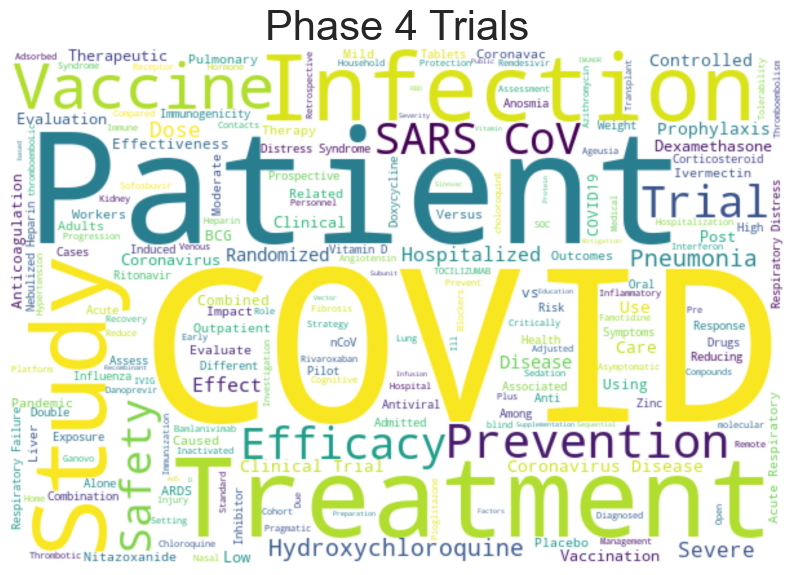

In [78]:
from wordcloud import WordCloud
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(phase_4_trials))

plt.figure(figsize=(10, 16))
plt.title('Phase 4 Trials',fontsize=30);
plt.imshow(wordcloud1, interpolation="gaussian")
plt.axis("off")
plt.show()